### Example 2 

dy/dt = t + y

initial condition: y0 = 0

range: 0 <= t <= 4

explicit solution:  y = exp(t) - t -1

Solve with forward Euler, modified Eueler and Runge-Kutta 4th order


In [1]:
import numpy as np
import matplotlib.pyplot as plt

Create time vector

In [2]:
T = 4                       # duration of simulation 
dt = 0.5                    # time step
N = round(T/dt)             # number of time steps    
t = np.arange(0, T+dt, dt)  # create and initialize time vector

Create y vectors

In [3]:
y = np.zeros(N+1)         # temporary storage of results
y[0] = 0                  # assign initial y0 value
ystor = np.zeros((3,N+1)) # matrix to store results for all three methods

#### Forward Euler

In [4]:
for j in range(0,N):
  y[j+1] = y[j] + dt*(t[j] + y[j])

ystor[0,:] = y    # store result

Modified Euler

In [5]:
for j in range(0,N):
  ystar = y[j] + dt*(t[j] + y[j])
  y[j+1] = y[j] + dt/2*((t[j] + y[j]) + (t[j+1] + ystar))

ystor[1,:] = y    # store result

Runge-Kutta 4th order

In [6]:
for j in range(0,N):
  k1 = dt*(t[j] + y[j])
  k2 = dt*((t[j] + dt/2) + (y[j] + k1/2))
  k3 = dt*((t[j] + dt/2) + (y[j] + k2/2))    
  k4 = dt*(t[j+1] + (y[j]+ k3)) 
  y[j+1] = y[j] + (k1 + 2*k2 + 2*k3 + k4)/6

ystor[2,:] = y    # store result

Evaluate explicit function

In [7]:
step = 0.05
t_exact = np.arange(0, T+step, step)
N = len(t_exact)
y_exact = np.zeros(N)
for j in range(0,N):
  y_exact[j] = np.exp(t_exact[j]) - t_exact[j] - 1

Plot results

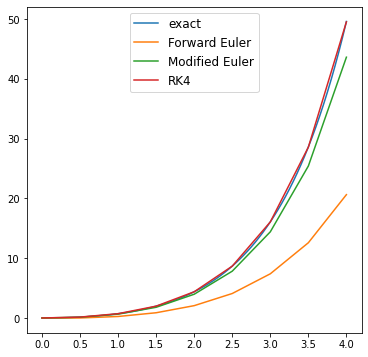

In [9]:
plt.rcParams['figure.figsize'] = [6, 6]
fig, ax = plt.subplots()
ax.plot(t_exact, y_exact, label='exact')
ax.plot(t, ystor[0,:], label='Forward Euler')
ax.plot(t, ystor[1,:], label='Modified Euler')
ax.plot(t, ystor[2,:], label='RK4')

legend = ax.legend(loc='upper center', fontsize='large')